In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np


In [2]:
# Step 1: Read CSV files
df_arb_batch = pd.read_csv('arb_batch_num.csv')
df_combined_scraped = pd.read_csv('combined_scraped_data.csv')

df_combined_scraped.rename(columns={"L1 Txn Hash":"hash"}, inplace=True)
df_combined_scraped.drop(columns="L1 Block", inplace=True)
df_arb_batch.drop(columns=["block_time","batch_num" ], inplace=True)

df = pd.merge(df_arb_batch, df_combined_scraped, on="hash", how="left")
df.dropna(inplace=True)

df['bytes_per_tx'] = df['data_length'] / df['Txn']

In [10]:
df

,hash,data_length,Txn,bytes_per_tx
3,0x309efe20efb57b7f07ee9b4211d79ae4ac4cecd5196b...,98864,727.0,135.988996
5,0xf6f114e3d646f1308a061ce91c7f367bc278b223e659...,98768,700.0,141.097143
35,0x7ec6e25cb0cc1c680f1fb21eddd2ef8356f92d6af7b5...,99216,742.0,133.714286
40,0xc6730c98dc6e98f8762e858cb26d4b348818aa678228...,98704,516.0,191.286822
49,0x1cd3f69c33582d6d8eb0609c4ff2e5b16b50506123fc...,99248,662.0,149.921450
...,...,...,...,...
315702,0x020d3414e2cde01cb457d38cccd12915bc324b699b3d...,98864,613.0,161.278956
316419,0x82e8812bb30938e5e64c5dfade96d39256d87291cdfa...,99632,735.0,135.553741
316711,0x759eba45d62ca5d3771e1c805425b228679c584cc531...,97584,657.0,148.529680
316912,0xb86f07ad6c28608ca749e29e986d9b26b4ca13cdb8c9...,98000,749.0,130.841121


TypeError: text() missing 1 required positional argument: 's'

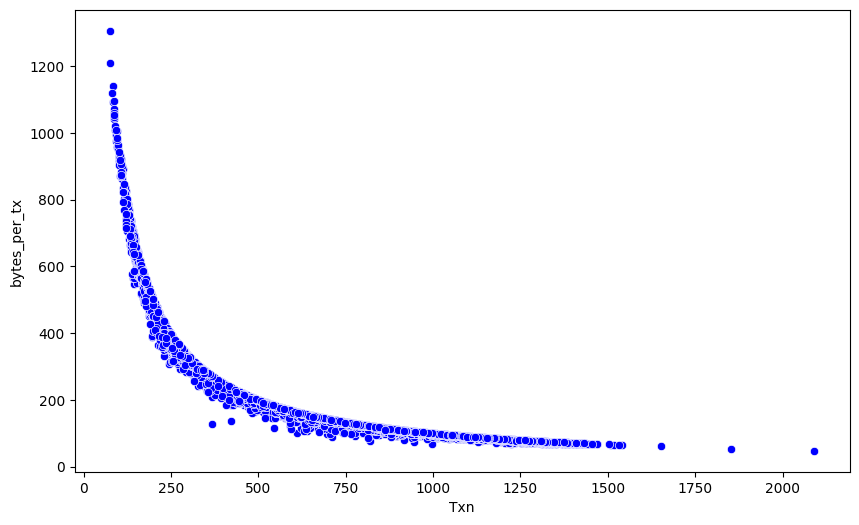

In [3]:
X = df[['Txn']]  # Predictor variable
y = df['bytes_per_tx']  # Response variable

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Txn', y='bytes_per_tx', color='blue')
plt.text(x=max(df['Txn']), y=min(df['bytes_per_tx']), color='green', fontweight='bold', horizontalalignment='right')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Txn')
plt.ylabel('Bytes per Tx')
plt.show()


In [4]:
x = df['Txn'].values
y = df['bytes_per_tx'].values

# Define the function you want to fit (a / (b * x))
def model(x, a, b):
    return a / (b * x)

# Perform the curve fit
params, covariance = curve_fit(model, x, y)

# Extract the fitted parameters
a_fit, b_fit = params

# Generate y-values for the fitted curve
y_fit = model(x, a_fit, b_fit)  


/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_75374/1926364608.py:12: RuntimeWarning: divide by zero encountered in divide
  return a / (np.power(x, b)) + c


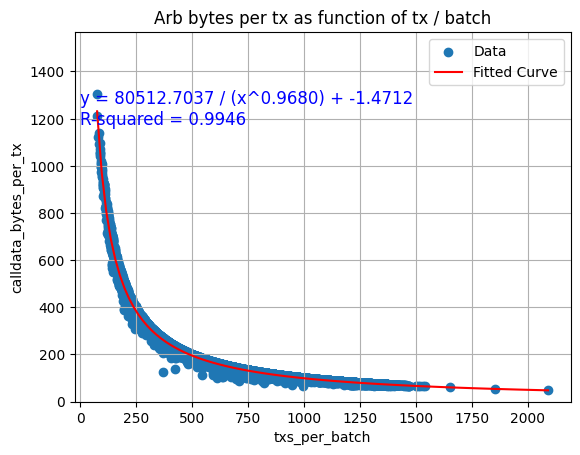

Fitted parameters: a = 80512.7037, b = 0.9680, c = -1.4712
Fitted equation: y = 80512.7037 / (x^0.9680) + -1.4712
R-squared value: 0.9946


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Sample data (replace with your actual data)
x_data = df['Txn'].values
y_data = df['bytes_per_tx'].values

# Define the model function (y = a / (x^b) + c)
def model(x, a, b, c):
    return a / (np.power(x, b)) + c

# Perform the curve fit
params, covariance = curve_fit(model, x_data, y_data, maxfev=10000)  # maxfev is increased for better convergence

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate y-values for the fitted curve
y_fit = model(x_data, a_fit, b_fit, c_fit)

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(y_data, y_fit)
r_squared = r_value**2

# Create a scatter plot of the data
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_curve = model(x_fit, a_fit, b_fit, c_fit)
plt.plot(x_fit, y_fit_curve, label='Fitted Curve', color='r')

# Calculate the fitted equation
equation = f'y = {a_fit:.4f} / (x^{b_fit:.4f}) + {c_fit:.4f}'

# Set y-axis limit (you can adjust this)
plt.ylim(0, max(y_data) * 1.2)

# Add the equation and R-squared value as text annotations on the plot
text_equation = f'{equation}\nR-squared = {r_squared:.4f}'
plt.text(0.1, max(y_data) * 0.9, text_equation, fontsize=12, color='b')

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('txs_per_batch')
plt.ylabel('calldata_bytes_per_tx')
plt.title('Arb bytes per tx as function of tx / batch')
plt.grid(True)

# Show the plot
plt.show()

# Display the fitted parameters, equation, and R-squared value
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")
print(f"Fitted equation: {equation}")
print(f"R-squared value: {r_squared:.4f}")


/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_75374/1926364608.py:12: RuntimeWarning: divide by zero encountered in divide
  return a / (np.power(x, b)) + c


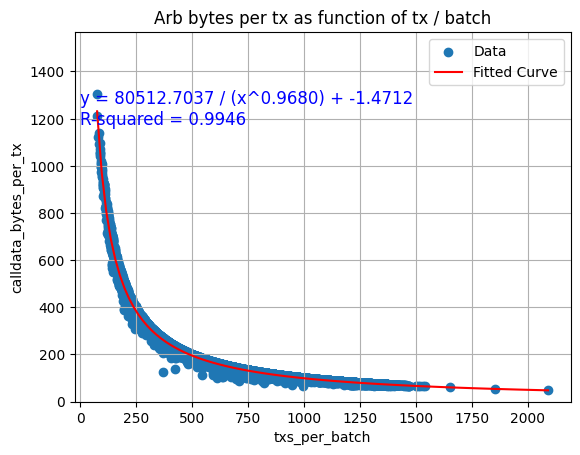

Fitted parameters: a = 80512.7037, b = 0.9680, c = -1.4712
Fitted equation: y = 80512.7037 / (x^0.9680) + -1.4712
R-squared value: 0.9946


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Sample data (replace with your actual data)
x_data = df['Txn'].values
y_data = df['bytes_per_tx'].values

# Define the model function (y = a / (x^b) + c)
def model(x, a, b, c):
    return a / (np.power(x, b)) + c

# Perform the curve fit
params, covariance = curve_fit(model, x_data, y_data, maxfev=10000)  # maxfev is increased for better convergence

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate y-values for the fitted curve
y_fit = model(x_data, a_fit, b_fit, c_fit)

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(y_data, y_fit)
r_squared = r_value**2

# Create a scatter plot of the data
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_curve = model(x_fit, a_fit, b_fit, c_fit)
plt.plot(x_fit, y_fit_curve, label='Fitted Curve', color='r')

# Calculate the fitted equation
equation = f'y = {a_fit:.4f} / (x^{b_fit:.4f}) + {c_fit:.4f}'

# Set y-axis limit (you can adjust this)
plt.ylim(0, max(y_data) * 1.2)

# Add the equation and R-squared value as text annotations on the plot
text_equation = f'{equation}\nR-squared = {r_squared:.4f}'
plt.text(0.1, max(y_data) * 0.9, text_equation, fontsize=12, color='b')

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('txs_per_batch')
plt.ylabel('calldata_bytes_per_tx')
plt.title('Arb bytes per tx as function of tx / batch')
plt.grid(True)

# Show the plot
plt.show()

# Display the fitted parameters, equation, and R-squared value
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")
print(f"Fitted equation: {equation}")
print(f"R-squared value: {r_squared:.4f}")
